# Radon Transform
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [radon_transform.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/radon_transform.ipynb)
---
Overview and implementation of discrete Radon transform.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.ndimage.interpolation import rotate
import numpy as np
import imageio

from _utils import *

In [2]:
image = imageio.imread('../_data/cameraman.png')/255

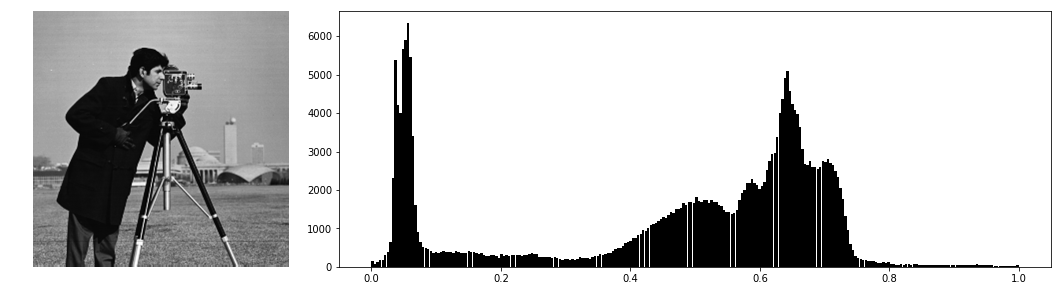

In [3]:
histogram(image, interval=[0, 1])

In [4]:
M, N = image.shape
M = complex(0, M)
N = complex(0, N)
s, t = np.mgrid[0:1:M, 0:1:N]
radial = ((0.5 - s)**2 + (0.5 - t)**2)**0.5 < 0.455
image_f = image*radial

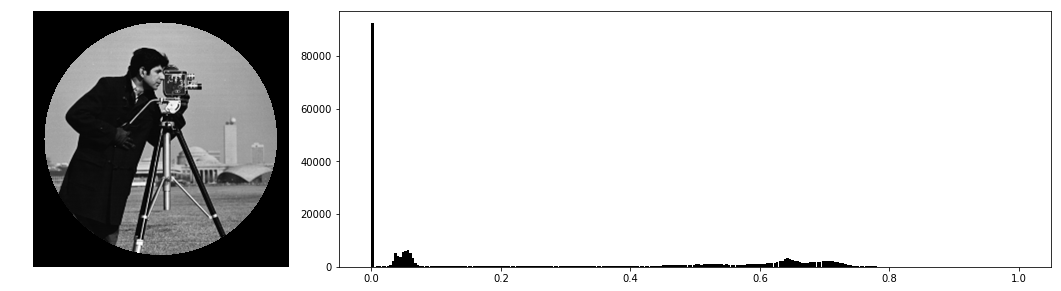

In [5]:
histogram(image_f, interval=[0, 1])

In [6]:
def sinogram(matrix, n_theta=18, theta_min=0, theta_max=360):
    '''
    n_theta => Number of axis inclinations
    theta_min => Minimum angle
    theta_max => Maximum angle
    '''
    N1, N2 = matrix.shape
    S = np.zeros((n_theta, max(N1, N2)))
    theta_max_ = theta_max*(1 - 1/n_theta)
    thetas = np.linspace(theta_max_, theta_min, n_theta)
    for e, theta in enumerate(thetas):
        rot = rotate(matrix, theta, reshape=False)
        S[e] = np.sum(rot, axis=0)
    return S.T

In [7]:
%%time
S = sinogram(image_f, 1024)
S = (S - S.min())/(S.max() - S.min())

Wall time: 46.4 s


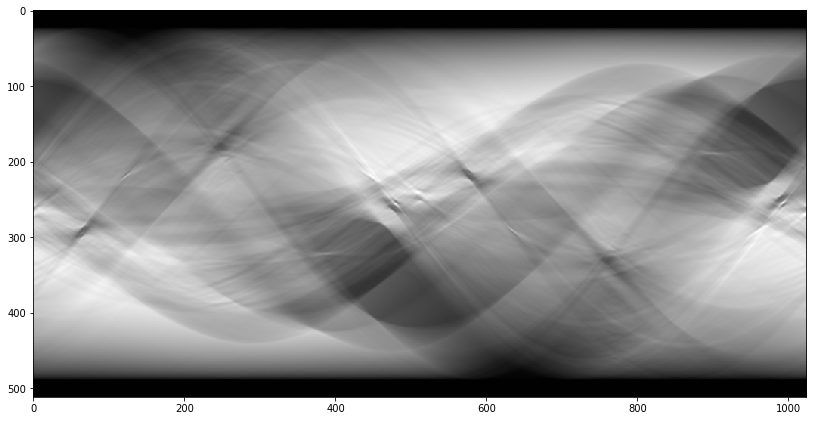

In [8]:
plt.figure(figsize=(1024/72, 512/72))
plt.imshow(S, cmap='gray')
plt.show()

In [9]:
def sinogram_i(S, FBP=True, filter_='ramlak', theta_min=0, theta_max=360):
    '''
    FBP => Filtered back projection
    filter_ => Kind of filter for frequency domain
    theta_min => Minimum angle
    theta_max => Maximum angle
    '''
    N, n_theta = S.shape
    Si = np.zeros((N, N), dtype=S.dtype)
    theta_min_ = theta_min*(1 - 1/n_theta)
    thetas = np.linspace(theta_min_, theta_max, n_theta)
    w = np.linspace(-1, 1, N)
    H = {'ramlak': abs(w)}
    for e, theta in enumerate(thetas):
        st = S[:, e]
        if FBP:
            ST = np.fft.fft(st)
            ST = np.fft.fftshift(ST)
            ST = np.fft.fftshift(ST*H[filter_])
            st = np.fft.ifft(ST).real
        st = np.tile(st, (N, 1))
        Si += rotate(st, theta, reshape=False)
    return Si

In [10]:
%%time
SiA = sinogram_i(S, FBP=False)
SiA = (SiA - SiA.min())/(SiA.max() - SiA.min())
SiB = sinogram_i(S, FBP=True)
SiB = (SiB - SiB.min())/(SiB.max() - SiB.min())

Wall time: 1min 33s


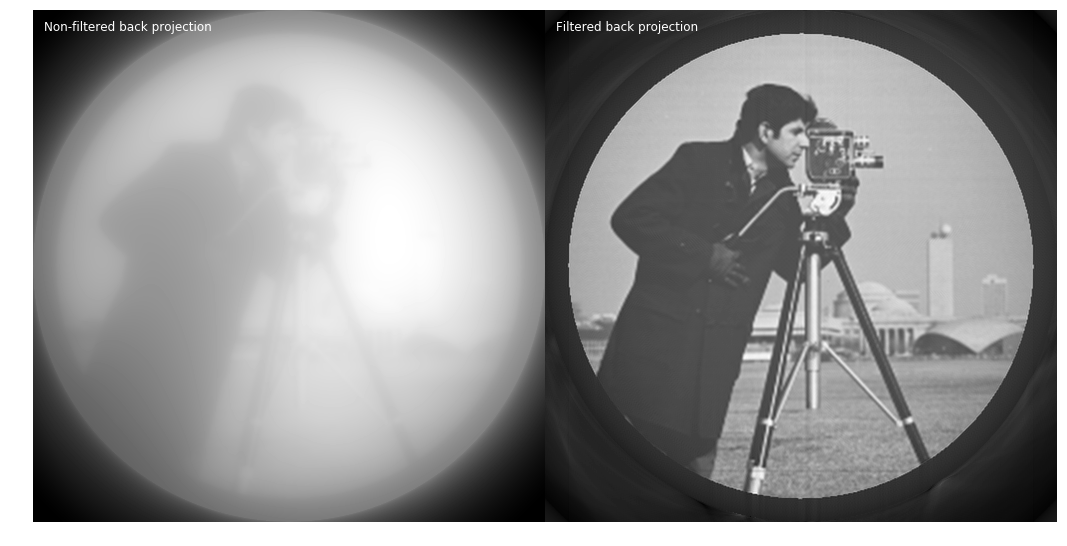

In [11]:
Si_l = np.array([SiA, SiB])
panel(Si_l, (2, 1),
      texts=['Non-filtered back projection',
             'Filtered back projection'])

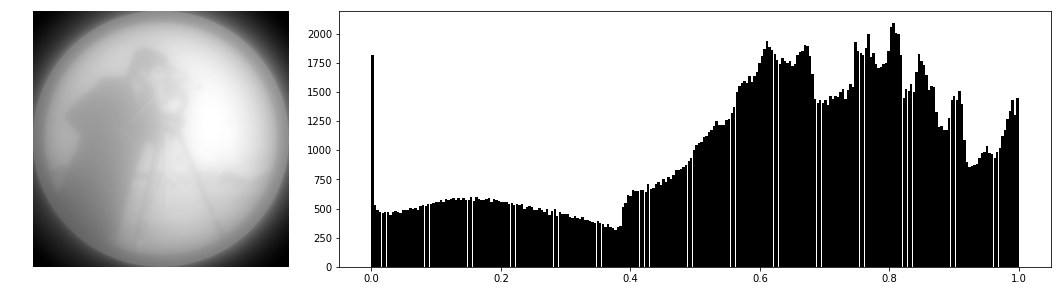

In [12]:
histogram(SiA, interval=[0, 1])

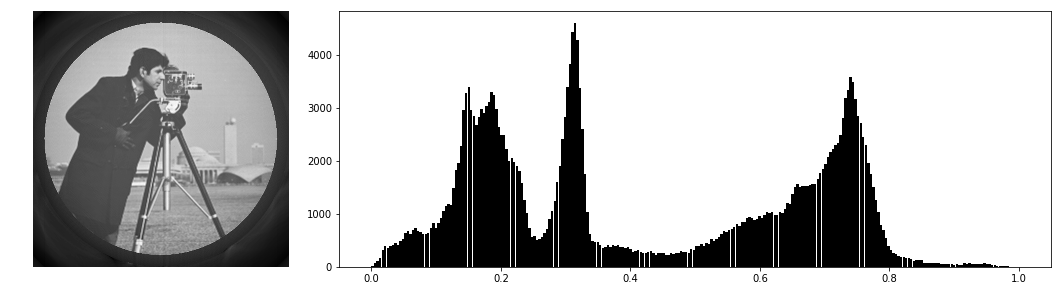

In [13]:
histogram(SiB, interval=[0, 1])

# Iterative reconstruction visualization
---
Demonstration of the iterative reconstruction of a multi-channel image from its radon tranformation sinogram.

In [14]:
from IPython.display import HTML

HTML(
    '<iframe width="960" height="540" src="https://www.youtube.com/embed/jHQzweHHDEE" frameborder="0" allowfullscreen></iframe>'
)